In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from scipy.ndimage.interpolation import shift

In [96]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X = train_df.drop('label', axis=1)
y = train_df['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=42)
X_train, X_val = X_train /255.0, X_val/255.0
X_test = test_df.to_numpy() / 255.0



In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(x,y):
    print('Digit label', y)
    some_digit = x.to_numpy()
    image = some_digit.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


Digit label 1


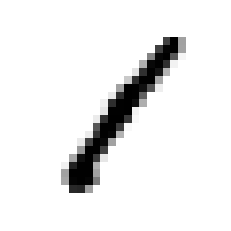

In [37]:
plot_digit(X.iloc[0],y[0])

In [38]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

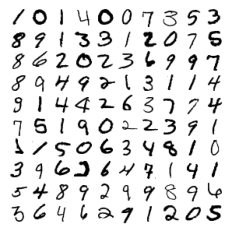

In [39]:
example_images = X[:100].to_numpy()
plot_digits(example_images, images_per_row=10)

# KMN Classfier

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.961, total= 2.0min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.960, total= 2.0min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.0min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.959, total= 2.0min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.962, total= 2.0min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.964, total= 2.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.962, total= 2.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.962, total= 2.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.961, total= 2.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.966, total= 2.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 60.4min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [44]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [46]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.96625

# SVC Classfier

In [55]:
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train/255.0, y_train) 
y_pred = svm_clf.predict(X_test/255.0)
accuracy_score(y_test, y_pred)

0.9310714285714285

# SGD Classfier

In [54]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train/255.0, y_train) 
y_pred = sgd_clf.predict(X_test/255.0)
accuracy_score(y_test, y_pred)

0.9082738095238095

# Tensor Flow

In [98]:
import tensorflow as tf
from tensorflow import keras


In [108]:
X_test.shape

(28000, 784)

In [109]:
X_test.reshape(28,28)

ValueError: cannot reshape array of size 21952000 into shape (28,28)

In [99]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [100]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [101]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_31 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0380 - accuracy: 0.9912 - val_loss: 0.1000 - val_accuracy: 0.9711
Epoch 2/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0361 - accuracy: 0.9918 - val_loss: 0.0965 - val_accuracy: 0.9719
Epoch 3/50
1050/1050 [==============================] - 2s 1ms/step - loss: 0.0343 - accuracy: 0.9926 - val_loss: 0.0989 - val_accuracy: 0.9699
Epoch 4/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0325 - accuracy: 0.9933 - val_loss: 0.0968 - val_accuracy: 0.9702
Epoch 5/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0309 - accuracy: 0.9932 - val_loss: 0.0955 - val_accuracy: 0.9724
Epoch 6/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0294 - accuracy: 0.9937 - val_loss: 0.0966 - val_accuracy: 0.9711
Epoch 7/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0281 - accuracy: 0.9943 - val_loss: 0.0947 - val_accuracy:

In [41]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 788}

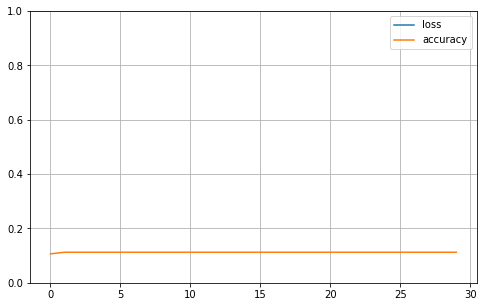

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Data Augumentation

In [99]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()


X_train_augmented = [image for image in X_train_np]
y_train_augmented = [label for label in y_train_np]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train_np, y_train_np):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print(X_train_augmented.shape)

knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

(126000, 784)


0.9757738095238095

# Predictions

In [116]:
predictions = model.predict_classes(X_test)

In [117]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [118]:
output = pd.DataFrame({'ImageId': test_df.index+1, 'Label': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [119]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


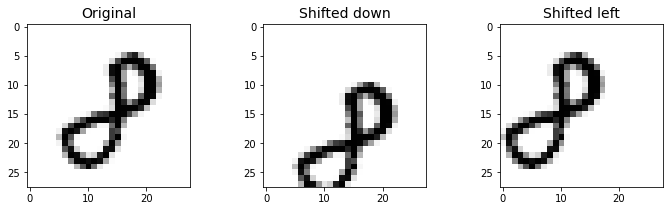

42000